<a href="https://colab.research.google.com/github/pb-roshith/image-classification-cifar10-using-cnn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
ytrain_one_hot=to_categorical(y_train)
ytest_one_hot=to_categorical(y_test)

In [13]:
x_train=x_train/255
x_test=x_test/255

In [15]:
from keras.layers.serialization import activation
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)             

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,ytrain_one_hot,batch_size=256,epochs=50,validation_split=0.2)

Epoch 1/50
157/157 [==============================] - 73s 452ms/step - loss: 1.7673 - accuracy: 0.3376 - val_loss: 1.4698 - val_accuracy: 0.4544
Epoch 2/50
157/157 [==============================] - 71s 454ms/step - loss: 1.3916 - accuracy: 0.4931 - val_loss: 1.3178 - val_accuracy: 0.5342
Epoch 3/50
157/157 [==============================] - 69s 437ms/step - loss: 1.2538 - accuracy: 0.5501 - val_loss: 1.2021 - val_accuracy: 0.5714
Epoch 4/50
157/157 [==============================] - 70s 448ms/step - loss: 1.1326 - accuracy: 0.5951 - val_loss: 1.0569 - val_accuracy: 0.6221
Epoch 5/50
157/157 [==============================] - 70s 448ms/step - loss: 1.0443 - accuracy: 0.6299 - val_loss: 1.0382 - val_accuracy: 0.6365
Epoch 6/50
157/157 [==============================] - 69s 437ms/step - loss: 0.9617 - accuracy: 0.6582 - val_loss: 1.0033 - val_accuracy: 0.6476
Epoch 7/50
157/157 [==============================] - 71s 454ms/step - loss: 0.9091 - accuracy: 0.6780 - val_loss: 0.9653 - val_ac

In [22]:
model.evaluate(x_test,ytest_one_hot)

313/313 [==============================] - 11s 34ms/step - loss: 1.4615 - accuracy: 0.6948


[1.4614921808242798, 0.6948000192642212]

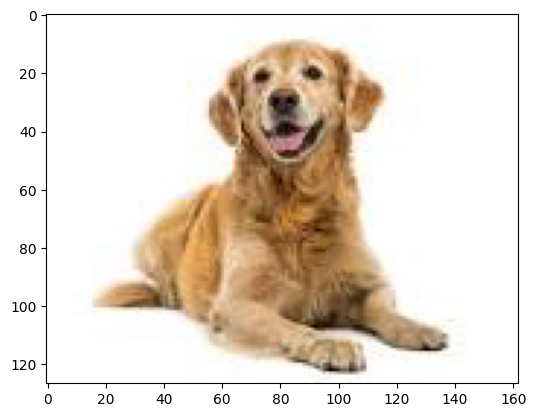

In [24]:
dog = plt.imread('dog.jpg')
img=plt.imshow(dog)

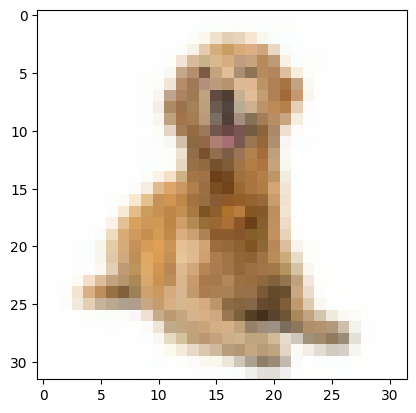

In [25]:
from skimage import transform
resize = transform.resize(dog, (32, 32, 3))
img=plt.imshow(resize)

In [26]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 125ms/step
[[3.9113525e-07 4.7908821e-07 4.6926277e-04 7.0572414e-02 4.4781655e-07
  9.2886800e-01 9.4103725e-06 7.8820791e-05 3.7649994e-07 5.0680518e-07]]


In [27]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 3, 2, 7, 6, 9, 1, 4, 0, 8]


In [29]:
for i in range(5):
  print(classification[list_index[i]])

dog
cat
bird
horse
frog
